In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import pandas as pd
from scipy.interpolate import make_interp_spline ##new import

# Set simulation parameters
Vthresh = -50   #mV
Vreset  = -70   #mV resting potential (going to value after spike)
Vspike  =  -50   #mV
Rm      =  10   #MOhms lower Resistance = lower spikes
tau     =  10   #ms
dt      =  1 #ms
counter =  0
i = 0 #counting the number of iterations
time = 10000*4 #ms (run for 40 seconds)
Se = 0.01 #strength of spike
r = 30/1000 #constant (spikes/ms) asked for frequency of 30Hz
counter_poisson = 0 #counting number of spikes
tau_e = 5 #excitatory conductance time constant
Ve = 0 #excitatory reversal potential

#Sine funciton variables

I_max =  1.8 #external current
I_min =  1.7 #external current
I_mid = ((I_max - I_min)/2) + I_min
period = 4000 #in ms
#



timeVector = np.arange(0, time, dt) #creating time vector of intervals of size dt


neuron_num = 10
neuron_arr = np.zeros((neuron_num, len(timeVector))).astype(int)

neuron_volt = np.zeros((neuron_num, len(timeVector)))



In [2]:

# Creates a placeholder for our voltages that is the same size as timeVector


# Creates a placeholder for the external stimulation vector.
# It is also the same size as the time vector.
stimVector = np.zeros(len(timeVector))

#sine function. 1 cycle every 4 seconds
stimVector[0:] = ((I_max - I_min)/2)    *  (np.sin( ( timeVector/((period)/(2*np.pi))  )  ) ) + I_mid




187


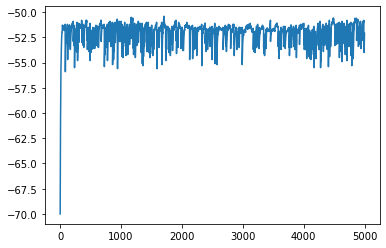

In [3]:
#Euler

voltageVector_neurons = np.zeros((neuron_num,len(timeVector))).astype(int)
voltageVector_neurons_avg = np.zeros(len(timeVector))

for n in range(neuron_num):
    counter_poisson = 0
    
    voltageVector = np.zeros(len(timeVector))
    voltageVector[0] = Vreset # Set the initial voltage to be equal to the resting potential

    geVector = np.zeros(len(timeVector)) #amount spike jumps, excitatory conductance
    spikeVector = np.zeros(len(timeVector)).astype(int) #holding 1s for spike and 0 for no spike at given interval
    
    
    # This line initiates the loop. "S" counts the number of loops.
    # We are looping for 1 less than the length of the time vector
    # because we have already calculated the voltage for the first
    # iteration.
    for S in range(len(timeVector)-1):

        #update Vinf using purple sheet
        Vinf = ((Rm * stimVector[S])/tau) + (Vreset - voltageVector[S])/tau + (Rm*geVector[S]*(Ve - voltageVector[S]))/tau # ((E + I*R)/tau) + (-v[i]/tau) #differential equation

        voltageVector[S+1] = Vinf * dt + voltageVector[S]  #v[i+1] = v[i] + dt *Vinf

        #upadate conductance decay as if no spike
        geVector[S+1] = geVector[S] * np.exp(-dt/tau_e)



      # This 'if' condition states that if the next voltage is greater than
      # or equal to the threshold, then to run the next section
        if voltageVector[S+1] >= Vthresh:
         # This states that the next voltage vector will be the Vspike value
            voltageVector[S+1] = Vspike

         # This 'if' statement checks if we are already at Vspike (this is
         # another way we can be above Vthresh)
            if voltageVector[S] == Vspike:
                #print(S) This prints the timing of spikes
                spikeVector[S] = 1 #add a 1 to indicate a spike in spikeVector

                #upadate conductance as if no spike
                #geVector[i] = geVector[i-1] * np.exp(-dt/j)
                counter_poisson += 1



            # Set the next voltage equal to the reset value
                voltageVector[S+1] = Vreset


        j = timeVector[S]     
        while j < timeVector[S+1]:

            j = -np.log(np.random.uniform(0,1))/r + timeVector[S] #r in ms Calculate wait time

            if j <= timeVector[S+1]: # see if wait time is in interval
            #if so, update conductance
                geVector[S+1] = geVector[S] +Se
                #spike will occur
    neuron_arr[n] = spikeVector
    neuron_volt[n] = voltageVector
    
    voltageVector_neurons[n, ] = voltageVector
    
for i in range(len(voltageVector)):
    voltageVector_neurons_avg[i,] = voltageVector_neurons[:,i].mean()
    #voltageVector_neurons_avg[i] = np.mean(voltageVector_neurons, axis = 1)

plt.plot(timeVector[:5000], voltageVector_neurons_avg[:5000])  

print(sum(spikeVector))

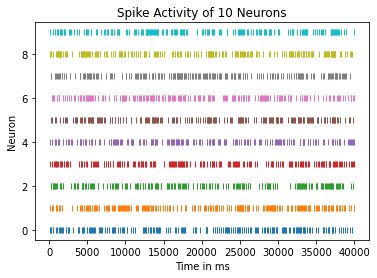

In [4]:
#Vector of specific times of spikes
for neuron in range(neuron_num):
    spikeVector = neuron_arr[neuron]    
    spike_time_Vector = np.zeros(sum(spikeVector)) 
    z = 0 #initialize z to begin at index 0
    for y in range(len(spikeVector)): #grab index of spike and compare to timeVector

        if spikeVector[y] == 1:
        
            spike_time_Vector[z] = timeVector[y] #add spike times in this vector 
            z = z + 1
            
    plt.plot(spike_time_Vector, np.zeros(len(spike_time_Vector))+neuron, marker = '|', linestyle = 'none')
    plt.xlabel("Time in ms")
    plt.ylabel("Neuron")
    plt.title("Spike Activity of 10 Neurons")

Text(0.5, 1.0, 'Firing Rate of a Neuron')

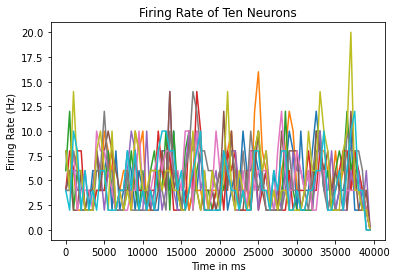

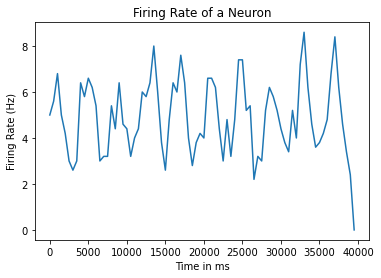

In [5]:
#Step 2: Test

max_bin = 500
min_bin = 0
total_spikes_bin = np.zeros(80) #number of bins
g = 0
total_spikes_temp = 0
q = 0
bin_size = 500
time_bin_vec = np.arange(0, time, bin_size)
n = 10 #number of elements per bin
fr_bin = np.zeros((neuron_num,8))
average_fr_bin = np.zeros(80)





for neuron in range(neuron_num):
    spikeVector = neuron_arr[neuron]    
    spike_time_Vector = np.zeros(sum(spikeVector)) 
    z = 0 #initialize z to begin at index 0
    max_bin = 500
    min_bin = 0
    total_spikes_bin = np.zeros(80) #number of bins
    g = 0
    total_spikes_temp = 0
    q = 0
    
    
    for y in range(len(spikeVector)): #grab index of spike and compare to timeVector

        if spikeVector[y] == 1:
        
            spike_time_Vector[z] = timeVector[y] #add spike times in this vector 
            z = z + 1
    
    for entry in spike_time_Vector:
        if entry <= max_bin and entry >= min_bin: 
            total_spikes_temp = total_spikes_temp + 1
            q = q + 1
        else:
            total_spikes_bin[g] = total_spikes_temp

            g = g + 1
            max_bin = max_bin + 500 #change to varible to make reproducible
            min_bin = min_bin + 500   
            total_spikes_temp = 1 # equal to 1 because entry must be placed in next time bin

    
    firing_rate_bin = total_spikes_bin * 2
    average_fr_bin = average_fr_bin + firing_rate_bin
    plt.plot(time_bin_vec, firing_rate_bin) #keep this
    plt.xlabel("Time in ms")
    plt.ylabel("Firing Rate (Hz)")
    plt.title("Firing Rate of Ten Neurons")
 

    #plt.plot(spike_time_Vector, np.zeros(len(spike_time_Vector))+neuron, marker = '|', linestyle = 'none')

#Average spikes at each phase and make histogram of averages at each phase. Bins of 4 seconds    
   
    start = 0
    for i in range(8):
        fr_bin[neuron,i] = np.mean(firing_rate_bin[start::7]) #grabbing spikes at same phase
        start = start + 1

           
        

#plot sine curve next to this
plt.figure()
plt.plot(time_bin_vec, average_fr_bin/neuron_num) #keep this  
plt.xlabel("Time in ms")
plt.ylabel("Firing Rate (Hz)")
plt.title("Firing Rate of a Neuron")

In [8]:
#Calculates average fr across phases for one neuron

#start = 0
#for i in range(8):
#    #print(i)
#    fr_bin[0,i] = np.mean(total_spikes_bin[start::7])
 #   start = start + 1


[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [10]:
#Calculate average fr across phases for 10 neurons (shouylkd have 8 numbers)


mean_fr_phases = np.zeros(8) #8 bins

for i in range(8):
    mean_fr_phases[i] = fr_bin[:,i].mean()
    
    
    

print(mean_fr_phases)
    

[4.86666667 4.78333333 4.6        5.41818182 5.38181818 4.58181818
 4.69090909 4.85454545]


Text(0.5, 1.0, 'Average Firing Rate of Ten Neurons by Phase')

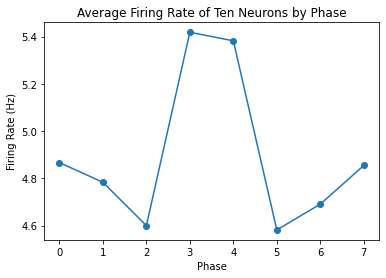

In [11]:
#mean_fr_phases, plot

#plot sine curve next to this (presentation)
#add error bars!!!
#change x axis to pi

phases = np.arange(8)

bars = ("")

plt.plot(phases, mean_fr_phases, marker = 'o')
plt.xlabel("Phase")
plt.ylabel("Firing Rate (Hz)")
plt.title("Average Firing Rate of Ten Neurons by Phase")
#plt.xticks(y_pos, bars)
#plt.errorbar(phases, mean_fr_phases, yerr = )'

#plot points on sine curve that correspond to proper bin sizees####

[-70.         -68.25       -66.67492146 ... -51.59907062 -51.63136998
 -51.67085004]


Text(0.5, 1.0, 'Conductance versus time')

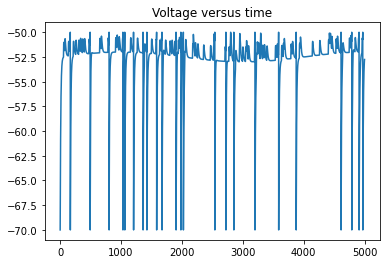

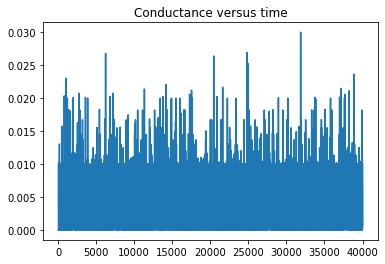

In [14]:
#Voltage and Conductance Plots

plt.figure()

# This plots the voltage (y-axis) as a function of time (x-axis)
plt.plot(timeVector[:5000], voltageVector[:5000])

# This sets the title
plt.title('Voltage versus time')

plt.figure()

# This plots the voltage (y-axis) as a function of time (x-axis)
plt.plot(timeVector, geVector)

# This sets the title
plt.title('Conductance versus time')


